# Covid Country Analysis

In [33]:
library(ggplot2)
library(GGally)
library(visdat)
library(ISLR2)
library(e1071)
library(caTools)
library(randomForest)


In [34]:
# Import datasets from csv

# Source: https://www.kaggle.com/datasets/imdevskp/corona-virus-report?resource=download&select=country_wise_latest.csv

# Online from github repo
#df = read.csv('')

# Local from disk
df = read.csv("country_wise_latest.csv")


In [35]:
head(df, 7)
str(df)
summary(df)

,Country.Region,Confirmed,Deaths,Recovered,Active,New.cases,New.deaths,New.recovered,Deaths...100.Cases,Recovered...100.Cases,Deaths...100.Recovered,Confirmed.last.week,X1.week.change,X1.week...increase,WHO.Region
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<chr>
1,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
2,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
3,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
4,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
5,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa
6,Antigua and Barbuda,86,3,65,18,4,0,5,3.49,75.58,4.62,76,10,13.16,Americas
7,Argentina,167416,3059,72575,91782,4890,120,2057,1.83,43.35,4.21,130774,36642,28.02,Americas


'data.frame':	187 obs. of  15 variables:
 $ Country.Region        : chr  "Afghanistan" "Albania" "Algeria" "Andorra" ...
 $ Confirmed             : int  36263 4880 27973 907 950 86 167416 37390 15303 20558 ...
 $ Deaths                : int  1269 144 1163 52 41 3 3059 711 167 713 ...
 $ Recovered             : int  25198 2745 18837 803 242 65 72575 26665 9311 18246 ...
 $ Active                : int  9796 1991 7973 52 667 18 91782 10014 5825 1599 ...
 $ New.cases             : int  106 117 616 10 18 4 4890 73 368 86 ...
 $ New.deaths            : int  10 6 8 0 1 0 120 6 6 1 ...
 $ New.recovered         : int  18 63 749 0 0 5 2057 187 137 37 ...
 $ Deaths...100.Cases    : num  3.5 2.95 4.16 5.73 4.32 3.49 1.83 1.9 1.09 3.47 ...
 $ Recovered...100.Cases : num  69.5 56.2 67.3 88.5 25.5 ...
 $ Deaths...100.Recovered: num  5.04 5.25 6.17 6.48 16.94 ...
 $ Confirmed.last.week   : int  35526 4171 23691 884 749 76 130774 34981 12428 19743 ...
 $ X1.week.change        : int  737 709 4282 23 201

 Country.Region       Confirmed           Deaths           Recovered        
 Length:187         Min.   :     10   Min.   :     0.0   Min.   :      0.0  
 Class :character   1st Qu.:   1114   1st Qu.:    18.5   1st Qu.:    626.5  
 Mode  :character   Median :   5059   Median :   108.0   Median :   2815.0  
                    Mean   :  88131   Mean   :  3497.5   Mean   :  50631.5  
                    3rd Qu.:  40460   3rd Qu.:   734.0   3rd Qu.:  22606.0  
                    Max.   :4290259   Max.   :148011.0   Max.   :1846641.0  
     Active            New.cases         New.deaths      New.recovered    
 Min.   :      0.0   Min.   :    0.0   Min.   :   0.00   Min.   :    0.0  
 1st Qu.:    141.5   1st Qu.:    4.0   1st Qu.:   0.00   1st Qu.:    0.0  
 Median :   1600.0   Median :   49.0   Median :   1.00   Median :   22.0  
 Mean   :  34001.9   Mean   : 1223.0   Mean   :  28.96   Mean   :  933.8  
 3rd Qu.:   9149.0   3rd Qu.:  419.5   3rd Qu.:   6.00   3rd Qu.:  221.0  
 Max.   :28

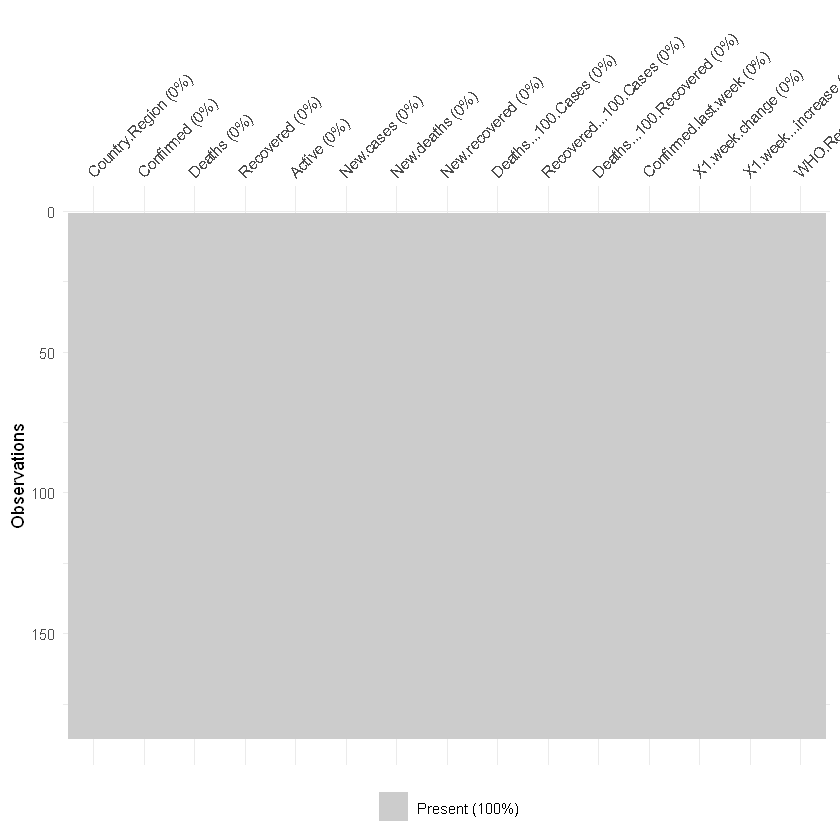

In [36]:
vis_miss(df)

## EDA

In [37]:
print(colnames(df))

 [1] "Country.Region"         "Confirmed"              "Deaths"                
 [4] "Recovered"              "Active"                 "New.cases"             
 [7] "New.deaths"             "New.recovered"          "Deaths...100.Cases"    
[10] "Recovered...100.Cases"  "Deaths...100.Recovered" "Confirmed.last.week"   
[13] "X1.week.change"         "X1.week...increase"     "WHO.Region"            


### Univariate EDA

#### Confirmed

In [38]:
boxplot.stats(df$Confirmed)

$stats
[1]    10.0  1114.0  5059.0 40460.5 92482.0

$n
[1] 187

$conf
[1]  512.8644 9605.1356

$out
 [1]  167416  226225 2442375  116458  347923  257101  220352  207112 1480073
[10]  100303  293606  112585  246286  395489  274289  389717  109597  816680
[19]  268934  452529  272421  227019 4290259  301708

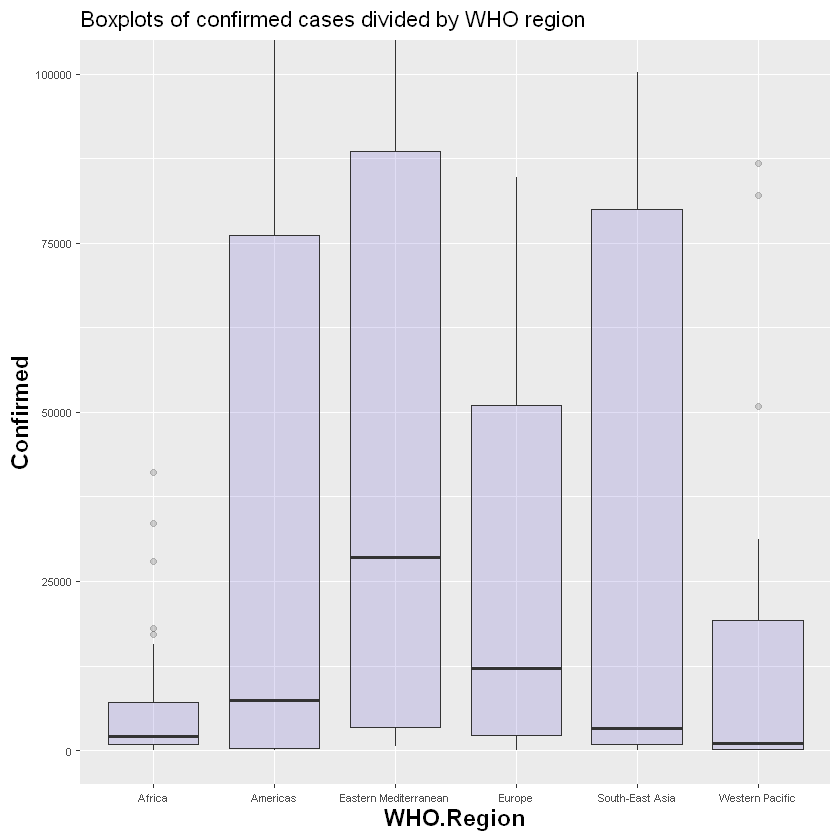

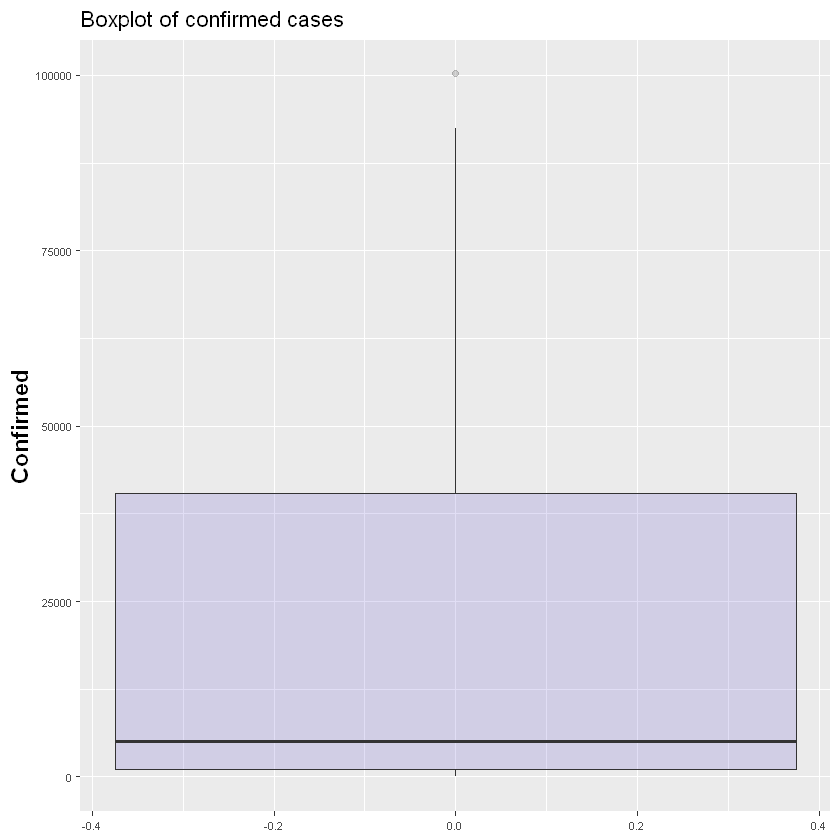

In [39]:
ggplot(df, aes(x=as.factor(WHO.Region), y=Confirmed)) + 
    geom_boxplot(fill="slateblue", alpha=0.2) + 
    ggtitle("Boxplots of confirmed cases divided by WHO region") +
    theme(
        axis.text=element_text(size=6.5), 
        axis.title=element_text(size=14,face="bold")
    ) +
    coord_cartesian(ylim = c(0, 100000)) + 
    xlab("WHO.Region")

ggplot(df, aes(y=Confirmed)) + 
    geom_boxplot(fill="slateblue", alpha=0.2) + 
    ggtitle("Boxplot of confirmed cases") +
    theme(
        axis.text=element_text(size=6.5), 
        axis.title=element_text(size=14,face="bold")
    ) +
    coord_cartesian(ylim = c(0, 100000)) 

In [40]:
png(filename = "img/Confirmed_conditional_boxplot.png", units="in", width=5, height=5, res=300)

ggplot(df, aes(x=as.factor(WHO.Region), y=Confirmed)) + 
    geom_boxplot(fill="slateblue", alpha=0.2) + 
    ggtitle("Boxplots of confirmed cases divided by WHO region") +
    theme(
        axis.text=element_text(size=6.5), 
        axis.title=element_text(size=14,face="bold")
    ) +
    coord_cartesian(ylim = c(0, 100000)) +
    xlab("WHO.Region")

dev.off()

png(filename = "img/Confirmed_boxplot.png", units="in", width=5, height=5, res=300)

ggplot(df, aes(y=Confirmed)) + 
    geom_boxplot(fill="slateblue", alpha=0.2) + 
    ggtitle("Boxplot of confirmed cases") +
    theme(
        axis.text=element_text(size=6.5), 
        axis.title=element_text(size=14, face="bold")
    ) +
    coord_cartesian(ylim = c(0, 100000))

dev.off()

png 
  2

png 
  2

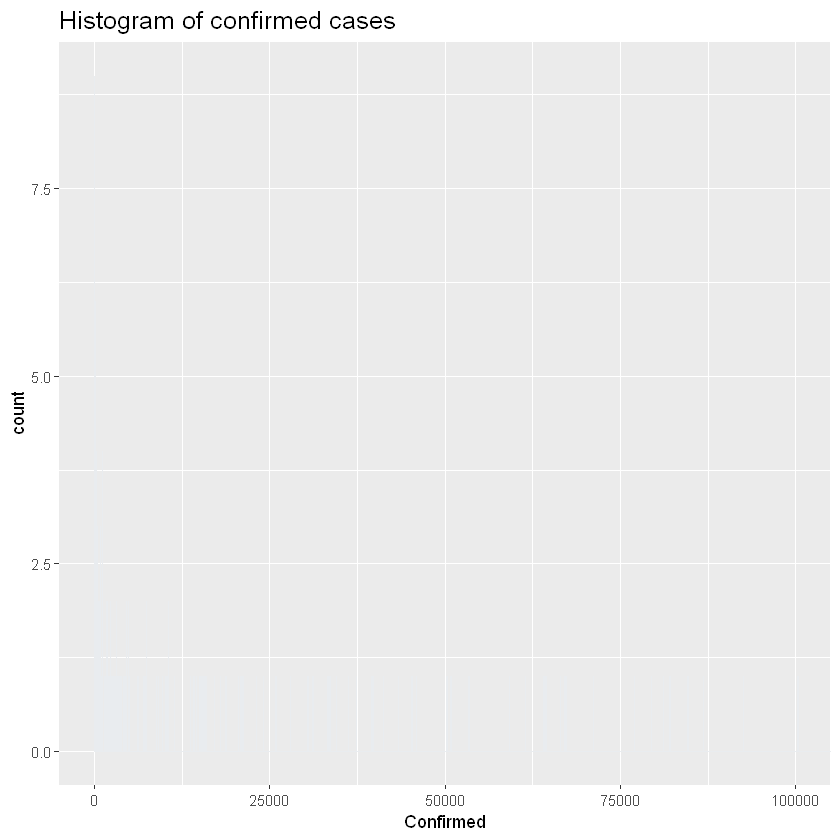

In [41]:
ggplot(df, aes(x=Confirmed)) +
    geom_histogram( binwidth=50, fill="#69b3a2", color="#e9ecef", alpha=0.9) +
    ggtitle("Histogram of confirmed cases") +
    theme(
      plot.title = element_text(size=15)
    ) + 
    coord_cartesian(xlim = c(0, 100000))

In [42]:
str(df)

'data.frame':	187 obs. of  15 variables:
 $ Country.Region        : chr  "Afghanistan" "Albania" "Algeria" "Andorra" ...
 $ Confirmed             : int  36263 4880 27973 907 950 86 167416 37390 15303 20558 ...
 $ Deaths                : int  1269 144 1163 52 41 3 3059 711 167 713 ...
 $ Recovered             : int  25198 2745 18837 803 242 65 72575 26665 9311 18246 ...
 $ Active                : int  9796 1991 7973 52 667 18 91782 10014 5825 1599 ...
 $ New.cases             : int  106 117 616 10 18 4 4890 73 368 86 ...
 $ New.deaths            : int  10 6 8 0 1 0 120 6 6 1 ...
 $ New.recovered         : int  18 63 749 0 0 5 2057 187 137 37 ...
 $ Deaths...100.Cases    : num  3.5 2.95 4.16 5.73 4.32 3.49 1.83 1.9 1.09 3.47 ...
 $ Recovered...100.Cases : num  69.5 56.2 67.3 88.5 25.5 ...
 $ Deaths...100.Recovered: num  5.04 5.25 6.17 6.48 16.94 ...
 $ Confirmed.last.week   : int  35526 4171 23691 884 749 76 130774 34981 12428 19743 ...
 $ X1.week.change        : int  737 709 4282 23 201

#### Deaths

In [43]:
png(filename = "img/Deaths_boxplot.png", units="in", width=5, height=5, res=300)

ggplot(df, aes(x=as.factor(WHO.Region), y=Deaths)) + 
    geom_boxplot(fill="slateblue", alpha=0.2) + 
    ggtitle("Boxplots of deaths cases") +
    theme(
        axis.text=element_text(size=6.5), 
        axis.title=element_text(size=14,face="bold")
    ) +
    xlab("WHO.Region")

dev.off()

png 
  2

#### Recovered

#### Active

#### New cases

#### New deaths

#### New recovered

#### Deaths / 100 Cases

#### Recovered / 100 Cases

#### Deaths / 100 Recovered

#### Confirmed last week

#### 1 week change

#### 1 week % increase

### Multivariate EDA

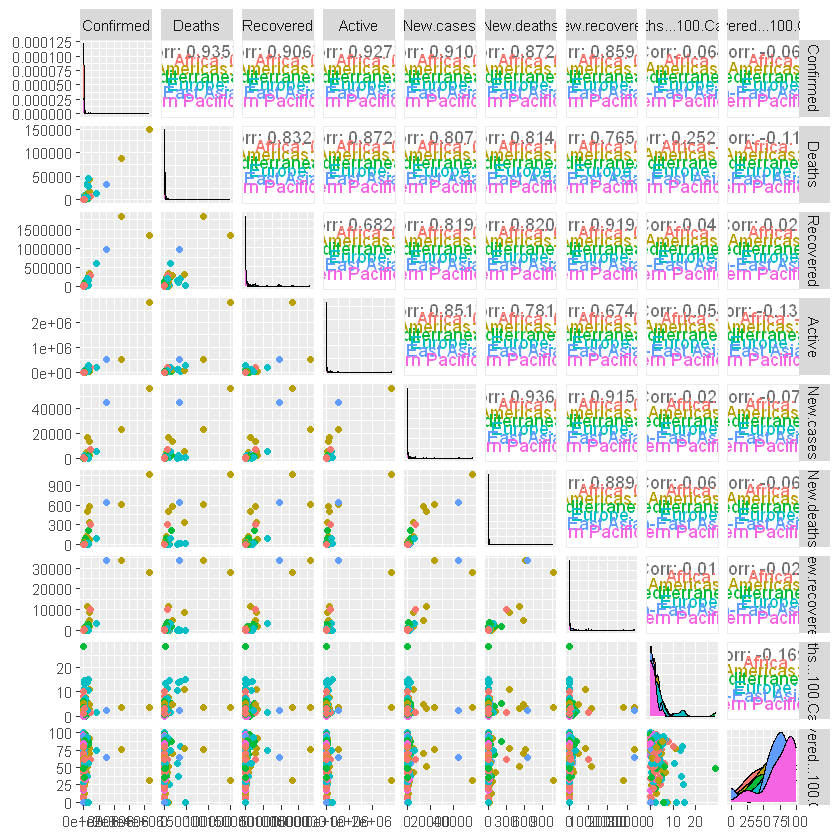

In [44]:
GGally::ggpairs(df, columns = 2:10, ggplot2::aes(colour=WHO.Region)) 

In [45]:
png(filename = "img/Corrmatrix_boxplot.png", units="in", width=5, height=5, res=300)

GGally::ggpairs(df, columns = 2:5, ggplot2::aes(colour=WHO.Region)) 

"
ggpairs(
  data,
  mapping = NULL,
  columns = 1:ncol(data),
  title = NULL,
  upper = list(continuous = "cor", combo = "box_no_facet", discrete = "count", na = "na"),
  lower = list(continuous = "points", combo = "facethist", discrete = "facetbar", na = "na"),
  diag = list(continuous = "densityDiag", discrete = "barDiag", na = "naDiag"),
  params = NULL,
  ...,
  xlab = NULL,
  ylab = NULL,
  axisLabels = c("show", "internal", "none"),
  columnLabels = colnames(data[columns]),
  labeller = "label_value",
  switch = NULL,
  showStrips = NULL,
  legend = NULL,
  cardinality_threshold = 15,
  progress = NULL,
  proportions = NULL,
  legends = stop("deprecated")
)
"

dev.off()

ERROR: Error in parse(text = x, srcfile = src): <text>:11:30: unexpected symbol
10:   title = NULL,
11:   upper = list(continuous = "cor
                                 ^


### Predictive Analysis

In [ ]:
set.seed(1)
sample = sample.split(df_accidents, SplitRatio = 0.8)
accidents_train = subset(df_accidents, sample == TRUE)
accidents_test  = subset(df_accidents, sample == FALSE)


ERROR: Error in sample.split(df_accidents, SplitRatio = 0.8): object 'df_accidents' not found


In [ ]:
#svmfit = svm(Morti ~ ., data = accidents_train, kernel = "linear", cost = 10, scale = TRUE)
#print(svmfit)
#y_predL = predict(svmfit, newdata = accidents_test[-19])


set.seed(13)

rf <- randomForest(Target ~ ., data = df_accidents, mtry = 3, importance = TRUE)
rf

ERROR: Error in eval(predvars, data, env): object 'Target' not found


ERROR: Error in predict.svm(svmfit, newdata = accidents_test[-19]): test data does not match model !
